In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Avocado_project.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
data = data.drop(columns = ['Unnamed: 0'], axis = 1)
data.shape

(18249, 13)

In [5]:
data.isna().sum().sum()

0

In [6]:
data.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

### Dataframe for Nominal data

In [7]:
nom_data = data[['type','region']].copy()

In [8]:
nom_data.columns

Index(['type', 'region'], dtype='object')

### Visualizing the data

conventional    9126
organic         9123
Name: type, dtype: int64


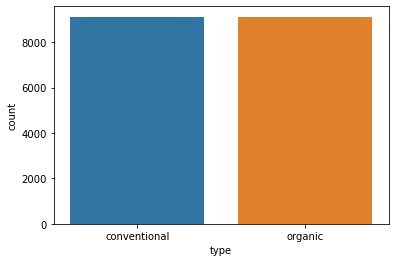

In [9]:
ax = sns.countplot(x = 'type', data = nom_data)
print(nom_data['type'].value_counts())

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

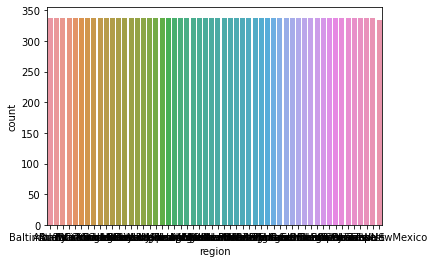

In [10]:
ax = sns.countplot(x = 'region', data = nom_data)
print(nom_data['region'].value_counts())

### Dataframe for Ordinal data

In [11]:
ord_data = data[['Date','year']].copy()

### Checking distribution for continuous value of float type columns

In [12]:
cont_data = data[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]
cont_data.shape

(18249, 9)

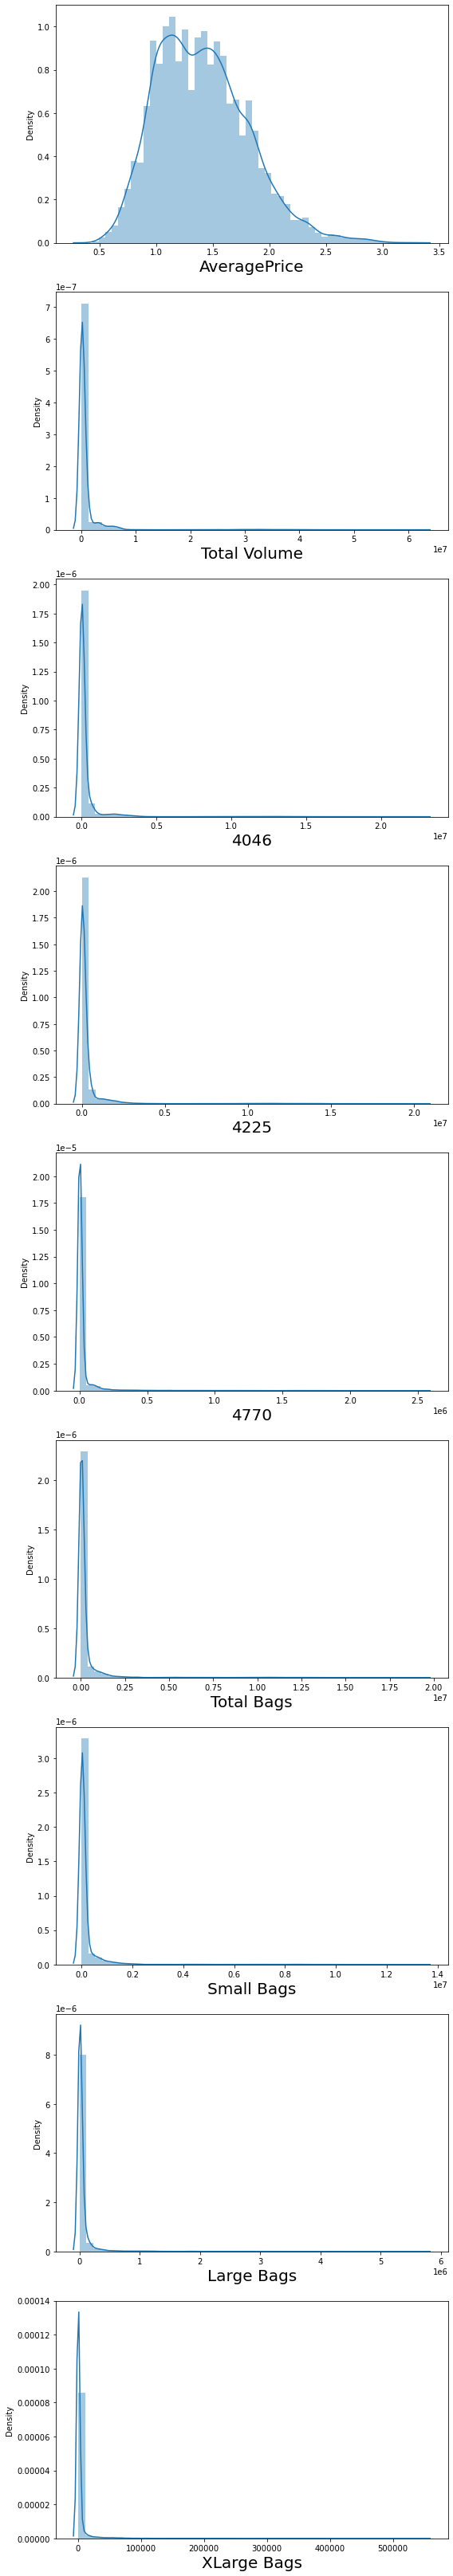

In [22]:
plt.figure(figsize = (8,45))
plotnumber = 1

for column in cont_data:
    if plotnumber<=9:
        ax = plt.subplot(9,1,plotnumber)
        sns.distplot(cont_data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber +=1
plt.tight_layout()

In [32]:
# transform into log values of features which looks skewed

cont_data['Total Volume'] = np.log(cont_data['Total Volume'])
cont_data['4046'] = np.log(cont_data['4046'])
cont_data['4225'] = np.log(cont_data['4225'])
cont_data['4770'] = np.log(cont_data['4770'])
cont_data['Total Bags'] = np.log(cont_data['Total Bags'])
cont_data['Small Bags'] = np.log(cont_data['Small Bags'])
data['Large Bags'] = np.log(cont_data['Large Bags'])
data['XLarge Bags'] = np.log(cont_data['XLarge Bags'])

### Encoding the dataframe

In [23]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [24]:
for i in data.columns:
    if data[i].dtypes == 'object':
        data[i] = oe.fit_transform(data[i].values.reshape(-1,1))

In [27]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,50.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,49.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,48.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,47.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161.0,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0
18245,160.0,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0
18246,159.0,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0
18247,158.0,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0


In [25]:
data.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,83.997096,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,48.787638,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,42.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,84.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,126.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,168.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


### Correlation of features with target

<AxesSubplot:>

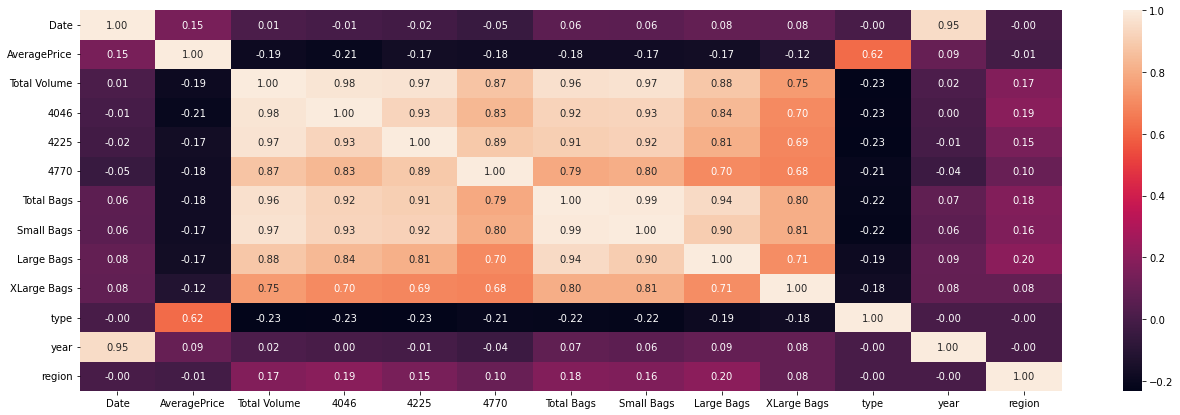

In [29]:
plt.figure(figsize = (22,7))
sns.heatmap(data.corr(), annot = True, fmt = '0.2f')

In [30]:
corr = data.drop('AveragePrice', axis = 1).corrwith(data.AveragePrice)
corr

Date            0.145514
Total Volume   -0.192752
4046           -0.208317
4225           -0.172928
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
XLarge Bags    -0.117592
type            0.615845
year            0.093197
region         -0.011716
dtype: float64

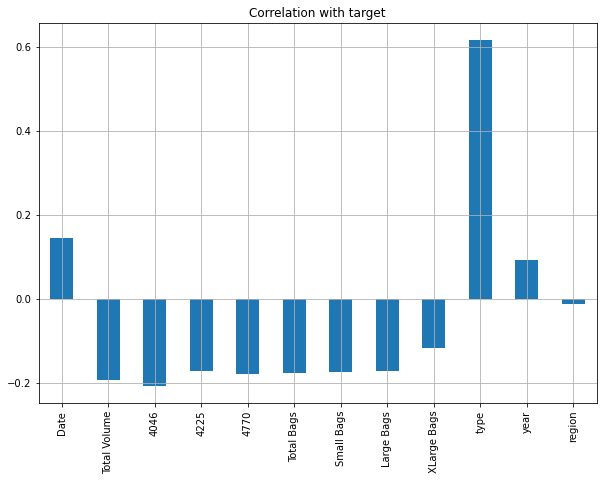

In [31]:
corr.plot(kind = 'bar', grid = True, figsize = (10,7),
          title = "Correlation with target")
plt.show()